## Graph Class 

In [53]:
class Vertex:
    def __init__(self, node):
        self.id = node
        self.adjacent = {}

    #def __str__(self):
    #    return str(self.id) + ' adjacent: ' + str([x.id for x in self.adjacent])

    def add_neighbor(self, neighbor, weight=0):
        self.adjacent[neighbor] = weight

    def get_connections(self):
        return self.adjacent.keys()  

    def get_id(self):
        return self.id

    def get_weight(self, neighbor):
        return self.adjacent[neighbor]

class Graph:
    def __init__(self):
        self.vert_dict = {}
        self.num_vertices = 0

    def __iter__(self):
        return iter(self.vert_dict.values())

    def add_vertex(self, node):
        self.num_vertices = self.num_vertices + 1
        new_vertex = Vertex(node)
        self.vert_dict[node] = new_vertex
        return new_vertex

    def get_vertex(self, n):
        if n in self.vert_dict:
            return self.vert_dict[n]
        else:
            return None

    def add_edge(self, frm, to, cost = 0):
        if frm not in self.vert_dict:
            self.add_vertex(frm)
        if to not in self.vert_dict:
            self.add_vertex(to)

        self.vert_dict[frm].add_neighbor(self.vert_dict[to], cost)
        self.vert_dict[to].add_neighbor(self.vert_dict[frm], cost)

    def get_vertices(self):
        return self.vert_dict.keys()

## Hill_Climbing_search Function

In [54]:
def Hill_Climbing_search(start_node,G,Path_dicts):
    adjacent = [x.id for x in G.get_vertex(start_node).adjacent]
    #print(adjacent,"ad")
    Queue = {}
    for item in adjacent:
        if item not in Path_dicts['{}'.format(start_node)] :
            Queue['{}'.format(item)] = h_dict['{}'.format(item)]
            Path_dicts['{}'.format(item)] = Path_dicts['{}'.format(start_node)] + [start_node] 
    #print(Queue)
    #print(Path_dicts)
    min_item = min(Queue, key=Queue.get)
    print("Node Selected ",min_item)
    if(min_item ==  str(len(Path_dicts))):
        print("Path to Goal Node ",Path_dicts['{}'.format(len(Path_dicts))]+[len(Path_dicts)])
        return 'done'
    Queue.pop('{}'.format(min_item))
    
    Hill_Climbing_search(int(min_item),G,Path_dicts)

## BFS_search Function

In [55]:
def BFS_search(start_node,Queues,G,Path_dicts):
    adjacent = [x.id for x in G.get_vertex(start_node).adjacent]
    #print(adjacent,"ad")
    
    for item in adjacent:
        if item not in Path_dicts['{}'.format(start_node)] :
            Queues['{}'.format(item)] = h_dict['{}'.format(item)]
            Path_dicts['{}'.format(item)] = Path_dicts['{}'.format(start_node)] + [start_node] 
    #print(Queues)
    #print(Path_dicts)
    min_item = min(Queues, key=Queues.get)
    print("Node Selected ",min_item)
    if(min_item == str(len(Path_dicts))):
        print("Path to Goal Node ",Path_dicts['{}'.format(len(Path_dicts))]+[len(Path_dicts)])
        return 'done' 
    Queues.pop('{}'.format(min_item))
    
    BFS_search(int(min_item),Queues,G,Path_dicts)

## Astar_search Function

In [56]:
def Astar_search(start_node,H_cost_dicts,G,Path_dicts,F_cost_dicts):
    adjacent = [x.id for x in G.get_vertex(start_node).adjacent]
    
    for item in adjacent:
        if item not in Path_dicts['{}'.format(start_node)] :
            Path_dicts['{}'.format(item)] = Path_dicts['{}'.format(start_node)] + [start_node]
            F_cost_dicts['{}'.format(item)] = F_cost_dicts['{}'.format(start_node)] + G.get_vertex(start_node).get_weight(G.get_vertex(item))
            H_cost_dicts['{}'.format(item)] = h_dict['{}'.format(item)] + F_cost_dicts['{}'.format(item)]
           
    #print("H_cost_dicts",H_cost_dicts)
    #print("F_cost_dicts",F_cost_dicts)
    #print(Path_dicts)
    min_item = min(H_cost_dicts, key=H_cost_dicts.get)
    print("Node Selected ",min_item)
    if(min_item ==  str(len(Path_dicts))):
        print("Path to Goal Node ",Path_dicts['{}'.format(len(Path_dicts))]+[len(Path_dicts)])
        return 'done'
    H_cost_dicts.pop('{}'.format(min_item))
    
    Astar_search(int(min_item),H_cost_dicts,G,Path_dicts,F_cost_dicts)  



##  Beam_search Function

In [57]:
def Beam_search_helper(start_node1,start_node2,start_node3,Queues,G,Path_dicts):
    adjacent1 = [x.id for x in G.get_vertex(start_node1).adjacent]
    adjacent2 = [x.id for x in G.get_vertex(start_node2).adjacent]
    adjacent3 = [x.id for x in G.get_vertex(start_node3).adjacent]
    #print(adjacent,"ad")
    
    for item in adjacent1:
        if item not in Path_dicts['{}'.format(start_node1)] :
            Queues['{}'.format(item)] = h_dict['{}'.format(item)]
            Path_dicts['{}'.format(item)] = Path_dicts['{}'.format(start_node1)] + [start_node1] 
    for item in adjacent2:
        if item not in Path_dicts['{}'.format(start_node2)] :
            Queues['{}'.format(item)] = h_dict['{}'.format(item)]
            Path_dicts['{}'.format(item)] = Path_dicts['{}'.format(start_node2)] + [start_node2] 
    for item in adjacent3:
        if item not in Path_dicts['{}'.format(start_node3)] :
            Queues['{}'.format(item)] = h_dict['{}'.format(item)]
            Path_dicts['{}'.format(item)] = Path_dicts['{}'.format(start_node3)] + [start_node3] 
            
    #print(Queues)
    #print(Path_dicts)
    min_item1 = min(Queues, key=Queues.get)
    print("Node Selected ",min_item1)
    if(min_item1 ==  str(len(Path_dicts))):
        print("Path to Goal Node ",Path_dicts['{}'.format(len(Path_dicts))]+[len(Path_dicts)])
        return 'done'
    Queues.pop('{}'.format(min_item1))
    min_item2 = min(Queues, key=Queues.get)
    print("Node Selected ",min_item2)
    if(min_item2 ==  str(len(Path_dicts))):
        print("Path to Goal Node ",Path_dicts['{}'.format(len(Path_dicts))]+[len(Path_dicts)])
        return 'done'
    Queues.pop('{}'.format(min_item2))
    min_item3 = min(Queues, key=Queues.get)
    print("Node Selected ",min_item3)
    if(min_item3 ==  str(len(Path_dicts))):
        print("Path to Goal Node ",Path_dicts['{}'.format(len(Path_dicts))]+[len(Path_dicts)])
        return 'done'
    Queues.pop('{}'.format(min_item3))
    
    
    Beam_search_helper(int(min_item1),int(min_item2),int(min_item3),Queues,G,Path_dicts)

def Beam_search(start_node1,Queues,G,Path_dicts):
    Beam_search_helper(start_node1,start_node1,start_node1,Queues,G,Path_dicts)
    

## Hill_Beam_search Function -- Alternate Hill climbing and Beam Search on  Random Graph

In [1]:
def Hill_Beam_search(start_node,G,Path_dicts):
    adjacent = [x.id for x in G.get_vertex(start_node).adjacent]
    #print(adjacent,"ad")
    Queue = {}
    for item in adjacent:
        if item not in Path_dicts['{}'.format(start_node)] :
            Queue['{}'.format(item)] = h_dict['{}'.format(item)]
            Path_dicts['{}'.format(item)] = Path_dicts['{}'.format(start_node)] + [start_node] 
    #print(Queue)
    #print(Path_dicts)
    min_item = min(Queue, key=Queue.get)
    print("Node Selected ",min_item)
    if(min_item ==  str(len(Path_dicts))):
        print("Path to Goal Node ",Path_dicts['{}'.format(len(Path_dicts))]+[len(Path_dicts)])
        return 'done'
    Queue.pop('{}'.format(min_item))
    
    Hill_Beam_search_helper1(int(min_item),int(min_item),int(min_item),Queue,G,Path_dicts)
    
def Hill_Beam_search_helper1(start_node1,start_node2,start_node3,Queues,G,Path_dicts):
    adjacent1 = [x.id for x in G.get_vertex(start_node1).adjacent]
    adjacent2 = [x.id for x in G.get_vertex(start_node2).adjacent]
    adjacent3 = [x.id for x in G.get_vertex(start_node3).adjacent]
    #print(adjacent,"ad")
    
    for item in adjacent1:
        if item not in Path_dicts['{}'.format(start_node1)] :
            Queues['{}'.format(item)] = h_dict['{}'.format(item)]
            Path_dicts['{}'.format(item)] = Path_dicts['{}'.format(start_node1)] + [start_node1] 
    for item in adjacent2:
        if item not in Path_dicts['{}'.format(start_node2)] :
            Queues['{}'.format(item)] = h_dict['{}'.format(item)]
            Path_dicts['{}'.format(item)] = Path_dicts['{}'.format(start_node2)] + [start_node2] 
    for item in adjacent3:
        if item not in Path_dicts['{}'.format(start_node3)] :
            Queues['{}'.format(item)] = h_dict['{}'.format(item)]
            Path_dicts['{}'.format(item)] = Path_dicts['{}'.format(start_node3)] + [start_node3] 
            
    #print(Queues)
    #print(Path_dicts)
    min_item1 = min(Queues, key=Queues.get)
    print("Node Selected ",min_item1)
    if(min_item1 ==  str(len(Path_dicts))):
        print("Path to Goal Node ",Path_dicts['{}'.format(len(Path_dicts))]+[len(Path_dicts)])
        return 'done'
    Queues.pop('{}'.format(min_item1))
    min_item2 = min(Queues, key=Queues.get)
    print("Node Selected ",min_item2)
    if(min_item2 ==  str(len(Path_dicts))):
        print("Path to Goal Node ",Path_dicts['{}'.format(len(Path_dicts))]+[len(Path_dicts)])
        return 'done'
    Queues.pop('{}'.format(min_item2))
    min_item3 = min(Queues, key=Queues.get)
    print("Node Selected ",min_item3)
    if(min_item3 ==  str(len(Path_dicts))):
        print("Path to Goal Node ",Path_dicts['{}'.format(len(Path_dicts))]+[len(Path_dicts)])
        return 'done'
    Queues.pop('{}'.format(min_item3))
    
    
    Hill_Beam_search_helper2(int(min_item1),int(min_item2),int(min_item3),Queues,G,Path_dicts) 

def Hill_Beam_search_helper2(start_node1,start_node2,start_node3,Queues,G,Path_dicts):
    adjacent1 = [x.id for x in G.get_vertex(start_node1).adjacent]
    adjacent2 = [x.id for x in G.get_vertex(start_node2).adjacent]
    adjacent3 = [x.id for x in G.get_vertex(start_node3).adjacent]
    
    for item in adjacent1:
        if item not in Path_dicts['{}'.format(start_node1)] :
            Queues['{}'.format(item)] = h_dict['{}'.format(item)]
            Path_dicts['{}'.format(item)] = Path_dicts['{}'.format(start_node1)] + [start_node1] 
    for item in adjacent2:
        if item not in Path_dicts['{}'.format(start_node2)] :
            Queues['{}'.format(item)] = h_dict['{}'.format(item)]
            Path_dicts['{}'.format(item)] = Path_dicts['{}'.format(start_node2)] + [start_node2] 
    for item in adjacent3:
        if item not in Path_dicts['{}'.format(start_node3)] :
            Queues['{}'.format(item)] = h_dict['{}'.format(item)]
            Path_dicts['{}'.format(item)] = Path_dicts['{}'.format(start_node3)] + [start_node3] 
            
    #print(Queues)
    
    min_item1 = min(Queues, key=Queues.get)
    print("Node Selected ",min_item1)
    if(min_item1 ==  str(len(Path_dicts))):
        print("Path to Goal Node ",Path_dicts['{}'.format(len(Path_dicts))]+[len(Path_dicts)])
        return 'done'
    Queues.pop('{}'.format(min_item1))


    
    Hill_Beam_search(int(min_item1),G,Path_dicts)    


## Generating Random Connected Graph and Initializing Various Parameter

In [60]:
import random
import os
import psutil
import time
import matplotlib.pyplot as plt   
if __name__ == '__main__':

    g = Graph()
    no_of_nodes = 10
    Goal_node = 10
    h_dict = {}
    h_dict['{}'.format(no_of_nodes)] = 0
    Path_dict = {}
    Path_dict['{}'.format(no_of_nodes)] = []
    queues = {}
    F_Cost_dict = {}
    F_Cost_dict['{}'.format(no_of_nodes)] = 0
    for i in range(1,no_of_nodes):
        h_dict['{}'.format(i)] = random.randint(1,random.randint(1,no_of_nodes*4))
        Path_dict['{}'.format(i)] = []
        F_Cost_dict['{}'.format(i)] = 0
    for i in range(no_of_nodes*2):
        g.add_edge(random.randint(1,no_of_nodes),random.randint(1,no_of_nodes),random.randint(1,no_of_nodes*2))
    random_node = random.randint(2,no_of_nodes-1)
    for i in range(1,no_of_nodes+1):
        g.add_edge(random_node,i,random.randint(1,random.randint(1,no_of_nodes*2)))
    for i in range(1,no_of_nodes+1):
        print(i,"  ",[x.id for x in g.get_vertex(i).adjacent])



1    [4, 7, 2, 10]
2    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
3    [10, 8, 2]
4    [4, 1, 7, 9, 2]
5    [6, 9, 2]
6    [8, 10, 5, 2]
7    [8, 1, 4, 2]
8    [6, 3, 9, 8, 7, 10, 2]
9    [5, 8, 4, 2]
10    [3, 6, 8, 1, 2]
BFS_search 
Node Selected  10
Path to Goal Node  [1, 10]
Time taken in seconds 0.000308990478515625 
-----------------------------------------------------------------------------------
Hill_Climbing_search
Node Selected  10
Path to Goal Node  [1, 10]
Time taken in seconds 0.0008420944213867188 
-----------------------------------------------------------------------------------
Astar_search
Node Selected  4
Node Selected  4
Node Selected  10
Path to Goal Node  [1, 10]
Time taken in seconds 0.0017192363739013672 
-----------------------------------------------------------------------------------
Beam_search
Node Selected  10
Path to Goal Node  [1, 10]
Time taken in seconds 0.0024819374084472656 
-----------------------------------------------------------------------------------


## Calling each Method and Calculating running time

In [ ]:
start_time1 = time.time()
print("BFS_search ")
BFS_search(1,queues,g,Path_dict)
print("Time taken in seconds %s " % (time.time() - start_time1))
print("-----------------------------------------------------------------------------------")

start_time2 = time.time()
print("Hill_Climbing_search")
Hill_Climbing_search(1,g,Path_dict)
print("Time taken in seconds %s " % (time.time() - start_time2))
print("-----------------------------------------------------------------------------------")

start_time3 = time.time()
print("Astar_search")
Astar_search( 1 ,queues,g,Path_dict,F_Cost_dict)
print("Time taken in seconds %s " % (time.time() - start_time3))
print("-----------------------------------------------------------------------------------")

start_time4 = time.time()
print("Beam_search")
Beam_search(1,queues,g,Path_dict)
print("Time taken in seconds %s " % (time.time() - start_time4))
print("-----------------------------------------------------------------------------------")

start_time5 = time.time()
print("Hill_Beam_search")
Hill_Beam_search(1,g,Path_dict)
print("Time taken in seconds %s " % (time.time() - start_time5))
print("-----------------------------------------------------------------------------------")

# Memory and Time Usage for Each Algorithm on different Input size.

In [62]:
import resource
resource.getrusage(resource.RUSAGE_SELF).ru_maxrss


process = psutil.Process(os.getpid())
print("Memory Uasge ",process.memory_info()[0])


Memory Uasge  84471808


In [63]:
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   10
# Hill_Climbing_search
# Path to Goal Node  [1, 10]
# Time taken in seconds 0.00010180473327636719 
# Memory used  10739712
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   100
# Hill_Climbing_search
# Path to Goal Node  [1, 96, 73, 4, 91, 76, 70, 70, 100]
# Time taken in seconds 0.0011217594146728516 
# Memory used  10813440
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   500
# Hill_Climbing_search
# Path to Goal Node  [1, 350, 458, 182, 249, 249, 411, 240, 418, 237, 245, 232, 475, 125, 248, 105, 121, 468, 320, 102, 47, 246, 83, 455, 455, 500]
# Time taken in seconds 0.0032639503479003906 
# Memory used  11358208
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   1000
# Hill_Climbing_search
# Path to Goal Node  [1, 192, 242, 690, 799, 612, 411, 981, 770, 427, 871, 745, 763, 109, 4, 4, 1000]
# Time taken in seconds 0.0037767887115478516 
# Memory used  11988992
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   5000
# Hill_Climbing_search
# Path to Goal Node  [1, 4369, 3102, 1212, 3728, 2743, 729, 1264, 4031, 2684, 1943, 1943, 5000]
# Time taken in seconds 0.018101930618286133 
# Memory used  17190912
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   10000
# Hill_Climbing_search
# Path to Goal Node  [1, 8492, 8492, 10000]
# Time taken in seconds 0.032115936279296875 
# Memory used  23212032
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   50000
# Hill_Climbing_search
# Path to Goal Node  [1, 4783, 13877, 2419, 23942, 23942, 50000]
# Time taken in seconds 0.20348715782165527 
# Memory used  83562496
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   100000
# Hill_Climbing_search
# Path to Goal Node  [1, 38335, 78309, 24103, 13879, 70963, 49817, 22912, 13856, 63789, 92457, 44187, 93624, 51214, 99238, 98985, 76811, 85780, 97783, 84115, 53373, 23539, 23539, 100000]
# Time taken in seconds 0.48791074752807617 
# Memory used  171978752
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   500000
# Hill_Climbing_search
# Path to Goal Node  [1, 94800, 445483, 219362, 438037, 268447, 428178, 464955, 425896, 415993, 22556, 471581, 415643, 483044, 362378, 266393, 99934, 231168, 117070, 399864, 57272, 487087, 179432, 410829, 161470, 294277, 439808, 196286, 271126, 255063, 358639, 370635, 84888, 220271, 374337, 16798, 431316, 125429, 446675, 97123, 325585, 145919, 88317, 337994, 337994, 500000]
# Time taken in seconds 3.05873703956604 
# Memory used  867962880
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   1000000
# Hill_Climbing_search
# Path to Goal Node  [1, 478275, 230278, 367435, 690856, 716127, 716127, 1000000]
# Time taken in seconds 4.740355014801025 
# Memory used  1400045568
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   10000000
# Hill_Climbing_search
# Path to Goal Node  [1, 4453844, 4453844, 10000000]
# Time taken in seconds 100.35815191268921 
# Memory used  2179620864

##  Hill Climbing Plot of Memory and Time vs Node_count

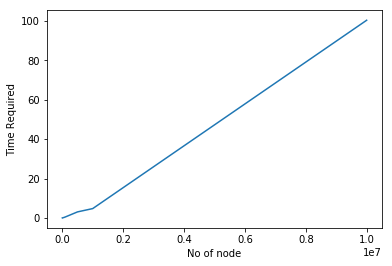

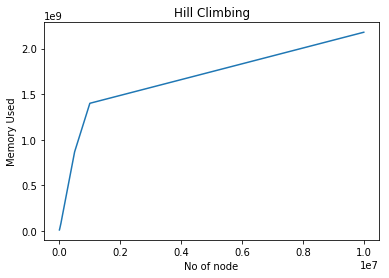

In [64]:
Nodes = [10,100,500,1000,5000,10000,50000,100000,500000,1000000,10000000]
Time_required = [0.00010180473327636719,0.0011217594146728516,0.0032639503479003906,0.0037767887115478516,0.018101930618286133,0.032115936279296875,0.20348715782165527, 0.48791074752807617,3.05873703956604,4.740355014801025, 100.35815191268921]
Memory_Used = [10739712,10813440,11358208,11988992,17190912,23212032,83562496,171978752,867962880,1400045568,2179620864]
plt.plot(Nodes,Time_required)
plt.xlabel('No of node')
plt.ylabel('Time Required')
plt.show()
plt.title("Hill Climbing")
plt.plot(Nodes,Memory_Used)
plt.xlabel('No of node')
plt.ylabel('Memory Used')
plt.show()

In [65]:
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   10
# BFS_search 
# Path to Goal Node  [1, 8, 10]
# Time taken in seconds 0.00016689300537109375 
# Memory used  10760192
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   50
# BFS_search 
# Path to Goal Node  [1, 48, 48, 50]
# Time taken in seconds 0.00031495094299316406 
# Memory used  10764288
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   100
# BFS_search 
# Path to Goal Node  [1, 14, 14, 100]
# Time taken in seconds 0.000621795654296875 
# Memory used  10756096
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   250
# BFS_search 
# Path to Goal Node  [1, 91, 218, 13, 87, 145, 98, 208, 163, 47, 123, 71, 175, 62, 247, 238, 221, 235, 154, 24, 110, 203, 200, 122, 187, 204, 231, 43, 90, 108, 19, 128, 117, 100, 198, 105, 42, 97, 161, 11, 171, 52, 191, 206, 180, 211, 250]
# Time taken in seconds 0.012835025787353516 
# Memory used  11329536
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   500
# BFS_search 
# Path to Goal Node  [1, 332, 332, 500]
# Time taken in seconds 0.0017430782318115234 
# Memory used  11247616
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   1000
# BFS_search 
# Path to Goal Node  [1, 749, 473, 787, 948, 250, 343, 984, 371, 739, 601, 329, 594, 620, 224, 881, 912, 431, 852, 220, 80, 565, 540, 357, 21, 133, 332, 175, 691, 223, 173, 634, 953, 207, 846, 545, 810, 263, 312, 293, 95, 761, 675, 559, 730, 428, 840, 826, 639, 407, 641, 459, 362, 660, 137, 952, 403, 1000]
# Time taken in seconds 0.047949790954589844 
# Memory used  12992512
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   2000
# BFS_search 
# Path to Goal Node  [1, 705, 1191, 1648, 1762, 1232, 1950, 1528, 2, 1693, 1525, 231, 77, 496, 1675, 375, 376, 1496, 80, 1449, 1803, 1014, 676, 612, 731, 1725, 117, 1241, 134, 955, 1114, 948, 1635, 673, 456, 445, 1791, 124, 514, 840, 520, 1234, 1671, 515, 7, 994, 1830, 433, 293, 526, 1389, 1274, 585, 1082, 1481, 1249, 238, 737, 977, 769, 487, 487, 2000]
# Time taken in seconds 0.04035687446594238 
# Memory used  14737408
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   4000
# BFS_search 
# Path to Goal Node  [1, 1447, 1558, 3358, 3911, 1295, 2943, 3473, 2040, 2966, 2966, 4000]
# Time taken in seconds 0.014021158218383789 
# Memory used  16232448

## Best First Search Plot of Memory and Time vs Node_count

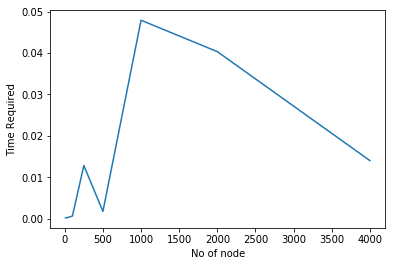

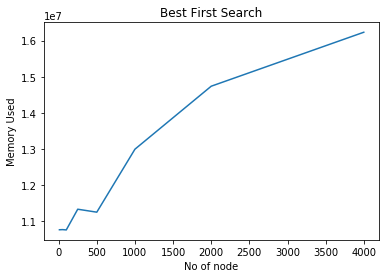

In [66]:
Nodes = [10,50,100,250,500,1000,2000,4000]
Time_required = [0.00016689,0.00031495,0.000621795,0.012835025,0.0017430782,0.04794979095,0.0403568744,0.014021158]
Memory_Used = [10760192,10764288,10756096,11329536,11247616,12992512,14737408,16232448]
plt.plot(Nodes,Time_required)
plt.xlabel('No of node')
plt.ylabel('Time Required')
plt.show()
plt.title("Best First Search")
plt.plot(Nodes,Memory_Used)
plt.xlabel('No of node')
plt.ylabel('Memory Used')
plt.show()

In [67]:
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   10
# Astar_search
# Path to Goal Node  [1, 9, 10]
# Time taken in seconds 0.0002129077911376953 
# Memory used  10846208
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   50
# Astar_search
# Path to Goal Node  [1, 36, 36, 50]
# Time taken in seconds 0.0010228157043457031 
# Memory used  10850304
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   100
# Astar_search
# Path to Goal Node  [1, 98, 52, 48, 33, 37, 10, 88, 75, 75, 100]
# Time taken in seconds 0.0014400482177734375 
# Memory used  10981376
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   250
# Astar_search
# Path to Goal Node  [1, 17, 117, 99, 140, 5, 250]
# Time taken in seconds 0.0011372566223144531 
# Memory used  11005952
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   500
# Astar_search
# Path to Goal Node  [1, 319, 319, 142, 500]
# Time taken in seconds 0.011873960494995117 
# Memory used  11382784
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   1000
# Astar_search
# Path to Goal Node  [1, 766, 766, 1000]
# Time taken in seconds 0.08249497413635254 
# Memory used  12431360
# no_of_nodes   2000
# Astar_search
# Path to Goal Node  [1, 44, 382, 63, 1115, 920, 1888, 141, 2000]
# Time taken in seconds 0.06563997268676758 
# Memory used  13869056
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   3000
# Astar_search
# Path to Goal Node  [1, 2667, 2667, 3000]
# Time taken in seconds 0.02209615707397461 
# Memory used  15155200
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   4000
# Astar_search
# Path to Goal Node  [1, 2048, 2548, 2548, 4000]
# Time taken in seconds 0.5084021091461182 
# Memory used  17268736

## Astar_search Plot of Memory and Time vs Node_count

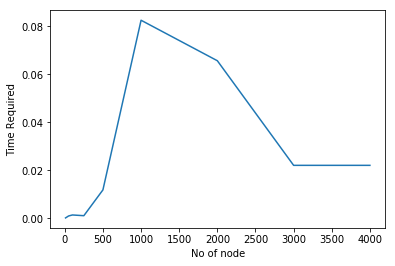

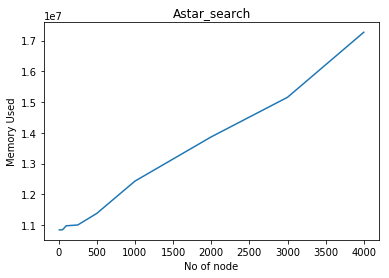

In [68]:
Nodes = [10,50,100,250,500,1000,2000,3000,4000]
Time_required = [0.000212907,0.00102281,0.00144004,0.0011372566,0.0118739604,0.082494974,0.0656399726,0.022096157,0.022096157]
Memory_Used = [10846208,10850304,10981376,11005952,11382784,12431360,13869056,15155200,17268736]
plt.plot(Nodes,Time_required)
plt.xlabel('No of node')
plt.ylabel('Time Required')
plt.show()
plt.title("Astar_search")
plt.plot(Nodes,Memory_Used)
plt.xlabel('No of node')
plt.ylabel('Memory Used')
plt.show()

In [69]:
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   10
# Hill_Beam_search
# Path to Goal Node  [1, 10]
# Time taken in seconds 5.793571472167969e-05 
# Memory used  10858496
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   100
# Hill_Beam_search
# Path to Goal Node  [1, 49, 34, 43, 100]
# Time taken in seconds 0.0003437995910644531 
# Memory used  10977280
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   1000
# Hill_Beam_search
# Path to Goal Node  [1, 453, 982, 982, 1000]
# Time taken in seconds 0.0035610198974609375 
# Memory used  11927552
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   5000
# Hill_Beam_search
# Path to Goal Node  [1, 1577, 1577, 5000]
# Time taken in seconds 0.043784141540527344 
# Memory used  17055744
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   10000
# Hill_Beam_search
# Path to Goal Node  [1, 297, 4304, 3309, 1191, 703, 5443, 8789, 71, 7412, 3106, 9717, 7296, 691, 7534, 339, 4490, 1885, 3058, 6095, 3012, 4763, 4763, 10000]
# Time taken in seconds 0.04376387596130371 
# Memory used  24899584
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   25000
# Hill_Beam_search
# Path to Goal Node  [1, 24118, 348, 19171, 13468, 6702, 12208, 18028, 18025, 21315, 10570, 14949, 3497, 3115, 4561, 21667, 11984, 22589, 2925, 13609, 3401, 4944, 1305, 11567, 4716, 8693, 11357, 18910, 11309, 1215, 23777, 23556, 11175, 15098, 11855, 11855, 25000]
# Time taken in seconds 0.1277623176574707 
# Memory used  52760576
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   50000
# Hill_Beam_search
# Path to Goal Node  [1, 45, 25755, 24971, 24971, 50000]
# Time taken in seconds 0.19859099388122559 
# Memory used  83341312
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   100000
# Hill_Beam_search
# Path to Goal Node  [1, 26500, 40223, 90308, 29470, 71431, 41006, 20171, 3501, 93896, 93896, 100000]
# Time taken in seconds 0.41624879837036133 
# Memory used  161873920
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   500000
# Hill_Beam_search
# Path to Goal Node  [1, 356539, 178401, 376626, 464598, 97146, 132897, 304096, 122228, 219242, 298, 469972, 469972, 500000]
# Time taken in seconds 6.564751148223877 
# Memory used  737292288
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   1000000
# Hill_Beam_search
# Path to Goal Node  [1, 24177, 540952, 344163, 381569, 245486, 534158, 700727, 960454, 873535, 63250, 122340, 801470, 335976, 878802, 998448, 361307, 170238, 824090, 473169, 849080, 590516, 787385, 758168, 218586, 12547, 132812, 327846, 265635, 488177, 737382, 462401, 87092, 616615, 616615, 1000000]
# Time taken in seconds 5.239784240722656 
# Memory used  1641615360
# Kunals-MacBook-Air:Downloads kunal$ python3 Heuristic\ Search.py
# no_of_nodes   10000000
# Hill_Beam_search
# Path to Goal Node  [1, 2640258, 8729967, 9407005, 5387499, 3590764, 7698819, 6513138, 1733253, 1733253, 10000000]
# Time taken in seconds 114.42948770523071 
# Memory used  2060107776

## Hill_Beam_search  Plot of Memory and Time vs Node_count

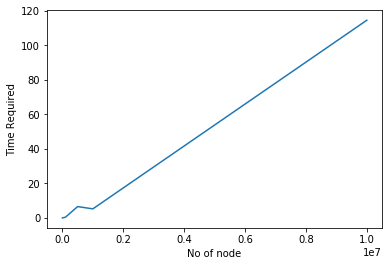

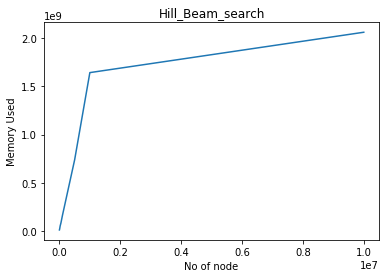

In [70]:
Nodes = [10,100,1000,5000,10000,25000,50000,100000,500000,1000000,10000000]
Time_required = [5.793571472167969e-05,0.0003437995,0.0035610198,0.043763875,0.043763875,0.12776231,0.198590993,0.4162487983,6.56475114,5.23978424,114.42948770]
Memory_Used = [10858496,10977280,11927552,17055744,24899584,52760576,83341312,161873920,737292288,1641615360,2060107776]
plt.plot(Nodes,Time_required)
plt.xlabel('No of node')
plt.ylabel('Time Required')
plt.show()
plt.title("Hill_Beam_search")
plt.plot(Nodes,Memory_Used)
plt.xlabel('No of node')
plt.ylabel('Memory Used')
plt.show()

### As the graph is randomly generated running time required for large input can be smaller as there can be relatively short path between Start node and Goal node